# 第1章 科研论文绘图及配色基础

## 1.1 配色方案
- 单色配色方案：通过调整同一颜色的亮度或明度来实现，或者用相临近的颜色。多用于同一系列、相同类型的数据。
- 互补色配色方案：即通过色轮上间隔180°的两个颜色来搭配，多用于实验组和对照组等对比强利的数据。
- 等距三角配色方案：将色轮上间隔120°的三个颜色搭配，但由于太过亮眼，颜色杂乱而用得少。但可以取一种颜色为主色，另外两种颜色适当缩小间隔作为辅助色进行组合。
- 四角配色方案：将色轮上间隔90°的四个颜色搭配，但这个方案的色彩过于杂乱，所以一般不建议使用。

## 1.2 色系
matlplotlib库中提供了许多单色渐变色系：

![单色渐变色系](./images/Sequential_colormaps.png)

双色渐变色系：

![双色渐变色系](./images/Diverging_colormaps.png)

多色系：

![多色系](./images/Qualitative_colormaps.png)

## 1.3 配色工具
常用的配色网站：<br>
[Adobe color](https://color.adobe.com/zh/create/color-wheel)<br>
[Color Scheme Designer](https://www.chinavid.com/color.html)<br>
[中国色](http://zhongguose.com/) <br>
[ColorBrewer 2.0](https://colorbrewer2.org/#type=sequential&scheme=OrRd&n=3)


## 1.4 代码实战

### 1.4.1 单色配色方案

参考资料：

[【知乎】Python可视化|matplotlib07-自带颜色条Colormap（三）](https://zhuanlan.zhihu.com/p/158871093)

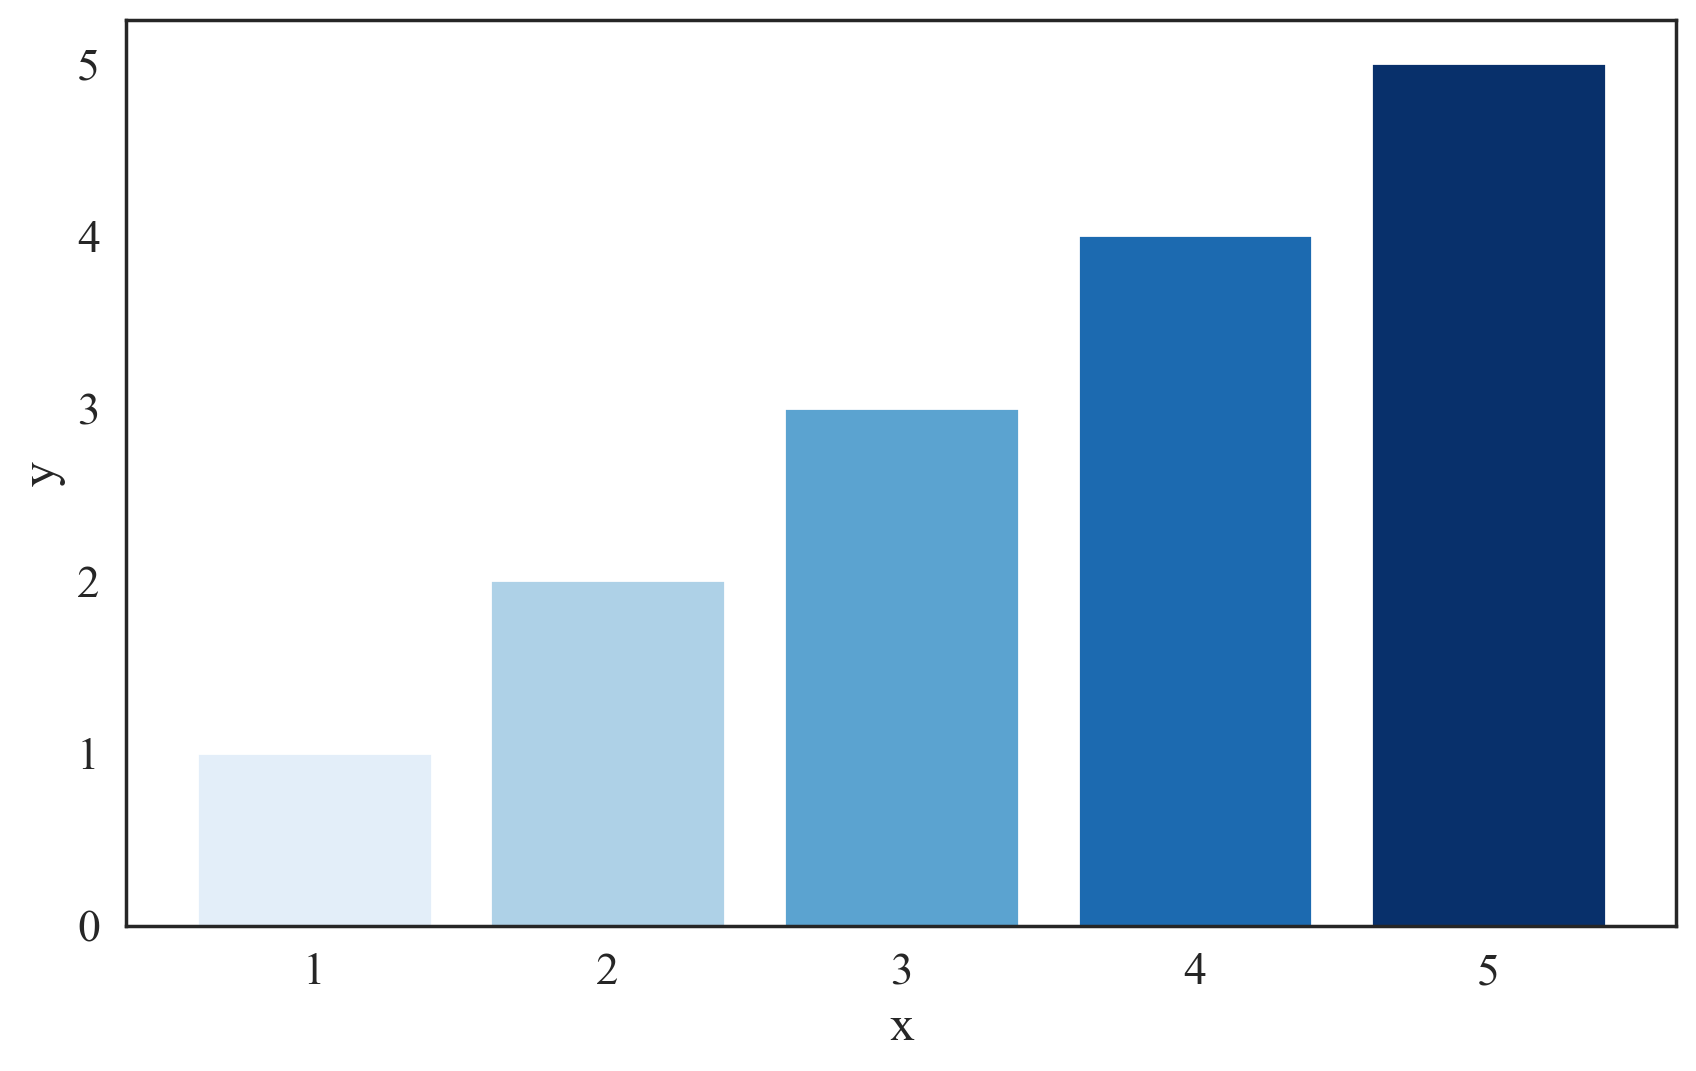

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

num  = 5
# iris = sns.load_dataset("iris")
sns.set_theme(style='white', font='Times New Roman', font_scale=1.5)

plt.figure(figsize=(10,6), dpi=200)

# 获取颜色映射的2种方式
# colormap = plt.cm.viridis
colormap = plt.get_cmap('Blues')

# 获得对应的颜色
# colors   = colormap(range(1, num + 1, 1)) # 0到255
# colors   = colormap(num)
colors   = colormap(np.linspace(0.1, 1, num)) # 按百分比

# 绘制条形图
plt.bar(range(1, 1 + num), range(1, 1 + num), color=colors)
# plt.hist(iris['sepal_width'], bins=10, color='b')

# 添加标签
plt.xlabel('x')
plt.ylabel('y')

# 显示图像
plt.savefig('./images/单色系.png')
plt.show()

### 1.4.2 互补色配色方案

In [5]:
def plot_template(means, std, width, labels, colors, title_='', saveflag=False, savedir='./images/',
                    figsize=(12, 9), dpi=100, fontscale=1.5):
    # 画图模板

    assert len(means) == len(std) == len(labels) == len(colors)
    # rc = {'font.sans-serif': 'SimHei',
    # 'axes.unicode_minus': False}
    # sns.set(context='notebook', style='whitegrid', font_scale=fontscale, rc=rc)

    # 画条形图
    fig, ax = plt.subplots(figsize=figsize, dpi=dpi, facecolor="w")
    plt.rcParams['font.family']='Times New Roman, SimHei'
    for name, value, err, label, color in zip(labels, means, std, labels, colors):
        ax.bar(name, value, yerr=err, label=label, color=color, ec="k", lw=linewidth,
               capsize=5, error_kw={'linewidth': linelinewidth})

    # 去除右边框和上边框
    for spine in ['top', 'right']:
        ax.spines[spine].set_visible(False)

    ax.grid(False)
    lower_bound = 0 if int(min(means)) - 10 < 0 else int(min(means)) - 10
    ax.set_ylim(lower_bound, int(max(means)) + 10)
    ax.legend(frameon=False, handlelength=1.5, handleheight=1.5)
    plt.title(title_)
    if saveflag:
        plt.savefig(f'{savedir}{title_}.png')
        plt.show()
    else:
        plt.show()


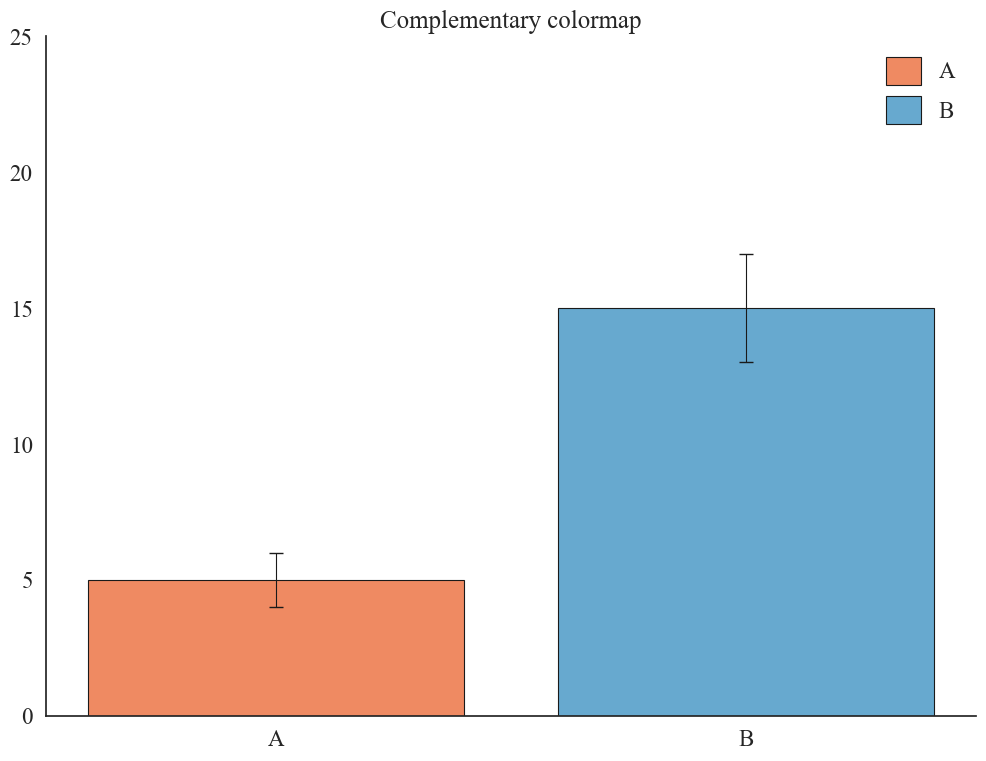

In [7]:
means = [5, 15]
std   = [1, 2]

linewidth = 0.8
labels    = ['A', 'B']

colors = ['#ef8a62', '#67a9cf']
plot_template(means, std, linewidth, labels, colors, title_='Complementary colormap', saveflag=True)

### 1.4.3 等距三角配色方案

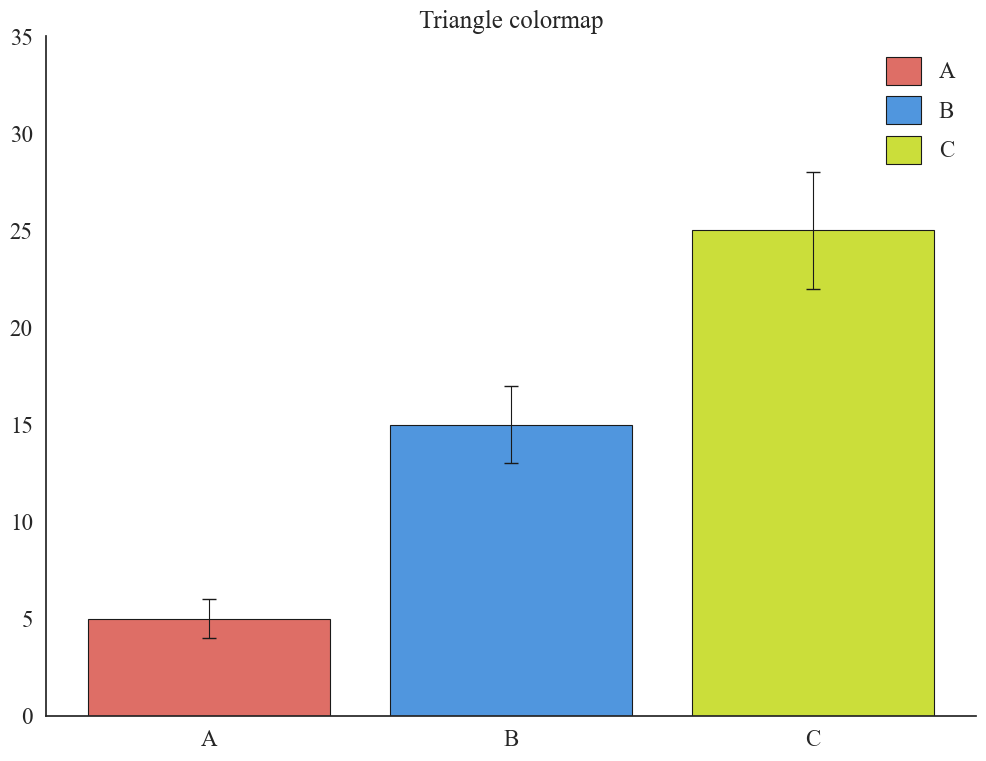

In [8]:
means = [5, 15, 25]
std   = [1, 2, 3]

labels    = ['A', 'B', 'C']
colors = ['#DE6E66', '#5096DE', '#CBDE3A']
plot_template(means, std, linewidth, labels, colors, title_='Triangle colormap', saveflag=True)

### 1.4.4 四色配色方案

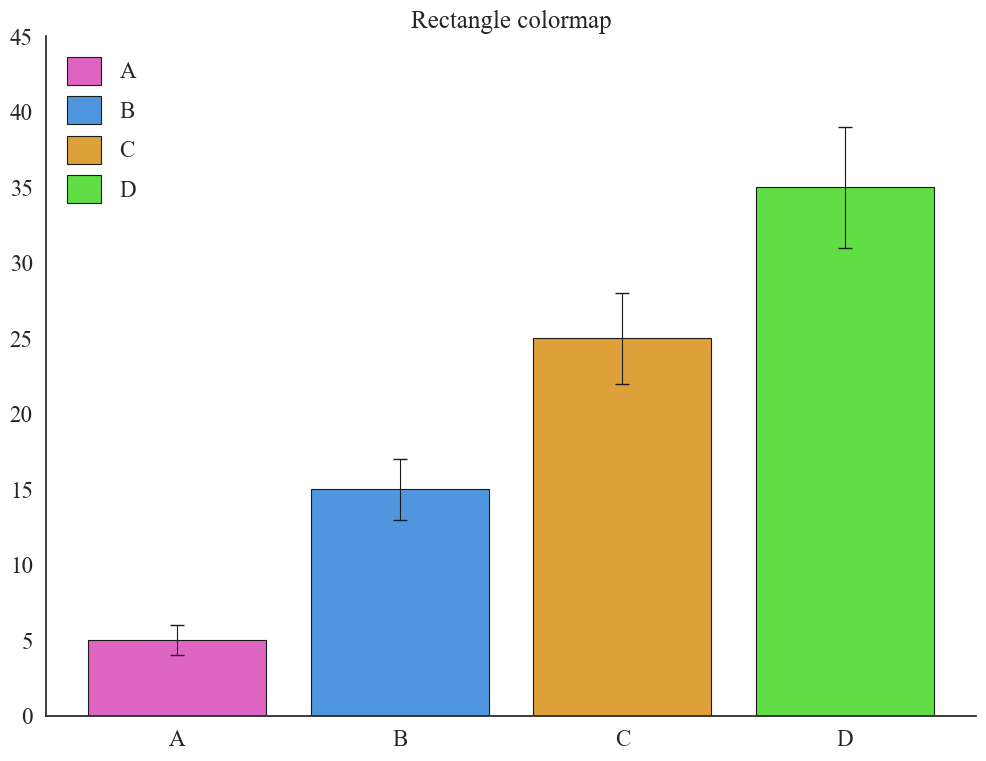

In [9]:
means = [5, 15, 25, 35]
std   = [1, 2, 3, 4]
labels    = ['A', 'B', 'C', 'D']
colors = ['#DE66C2', '#5096DE', '#DEA13A', '#61DE45']

plot_template(means, std, linewidth, labels, colors, title_='Rectangle colormap', saveflag=True)

### 1.4.5 单色渐变


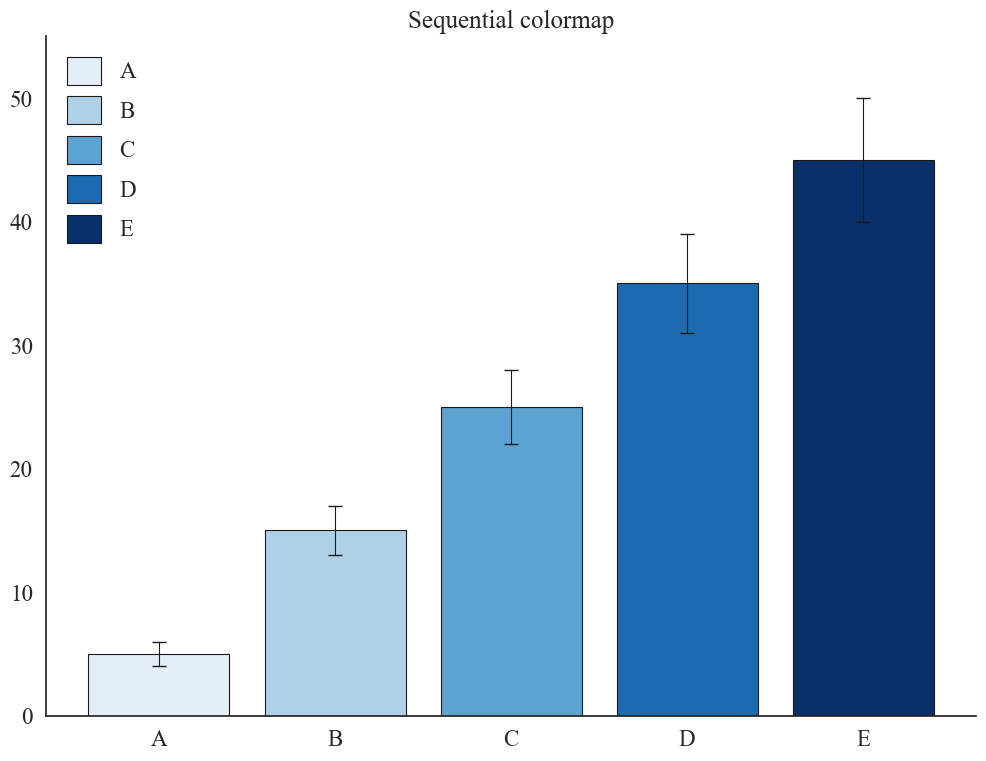

In [11]:
means = [5, 15, 25, 35, 45]
std   = [1, 2, 3, 4, 5]
labels    = ['A', 'B', 'C', 'D', 'E']

colormap = plt.get_cmap('Blues')
colors   = colormap(np.linspace(0.1, 1, len(means)))

plot_template(means, std, linewidth, labels, colors, title_='Sequential colormap', saveflag=True)

### 1.4.6 双色渐变


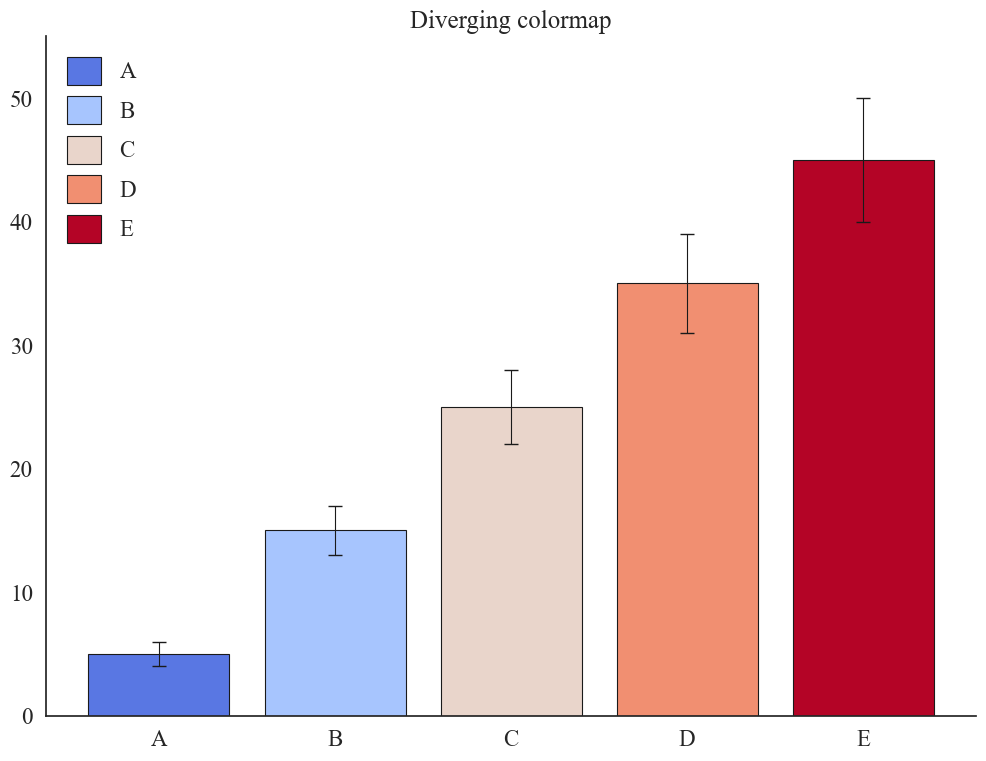

In [16]:
means = [5, 15, 25, 35, 45]
std   = [1, 2, 3, 4, 5]
labels    = ['A', 'B', 'C', 'D', 'E']

colormap = plt.get_cmap('coolwarm')
colors   = colormap(np.linspace(0.1, 1, len(means)))

plot_template(means, std, linewidth, labels, colors, title_='Diverging colormap', saveflag=True)

### 1.4.7 多色系


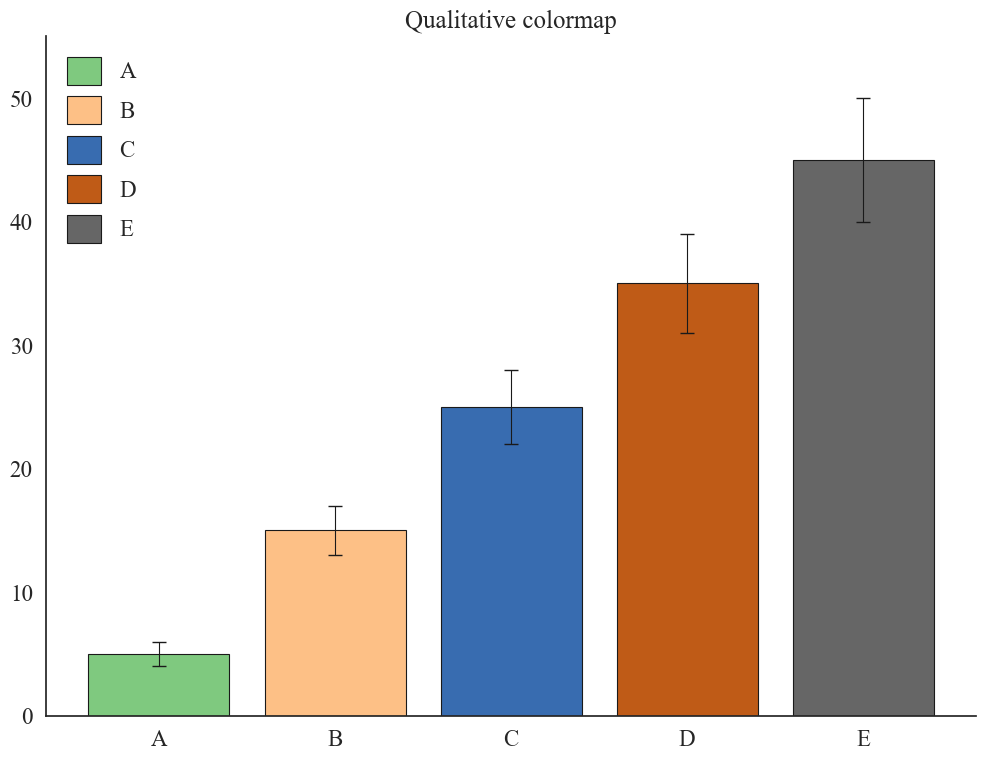

In [29]:
means = [5, 15, 25, 35, 45]
std   = [1, 2, 3, 4, 5]
labels    = ['A', 'B', 'C', 'D', 'E']

colormap = plt.get_cmap('Accent')
colors   = colormap(np.linspace(0, 1, len(means)))

plot_template(means, std, linewidth, labels, colors, title_='Qualitative colormap', saveflag=True)

参考资料：<br>
[1] [Datawhale 科研论文配图绘制指南--基于Python》](https://github.com/datawhalechina/paper-chart-tutorial)<br>
[2] [matplotlib 官方文档](https://matplotlib.org/stable/tutorials/index) <br>
[3] [Seaborn 官方文档](https://seaborn.pydata.org/) <br>